## Dataset preparation from online

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')

In [2]:
response = google_images_download.googleimagesdownload()
search_queries = ['happy dogs','smiling dogs','sad dogs','frown dogs']

In [3]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    print_urls=True)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [4]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 683 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 533 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 349 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 653 is all we got for this search filter!
Downloaded 681 happy dogs images!
Downloaded 533 smiling dogs images!
Downloaded 346 sad dogs images!
Downloaded 652 frown dogs images!


#### NOTE: at this stage, manually go over the downloaded files to get rid of "bad" images; this does not necessarily have to be thorough. 

### Processing into two categories

In [5]:
import shutil
data_folders = os.listdir(data_path)

source_happy = os.path.join(data_path,'smiling dogs')
dest_happy = os.path.join(data_path,'happy dogs')
source_sad = os.path.join(data_path,'frown dogs')
dest_sad = os.path.join(data_path,'sad dogs')

files_happy = os.listdir(source_happy)
files_sad = os.listdir(source_sad)
for f in files_happy:
    if not os.path.exists(os.path.join(dest_happy,f)):
        shutil.move(os.path.join(source_happy,f), dest_happy)   
for f in files_sad:
    if not os.path.exists(os.path.join(dest_sad,f)):
        shutil.move(os.path.join(source_sad,f), dest_sad)
        
shutil.rmtree(os.path.join(data_path,'smiling dogs'))
shutil.rmtree(os.path.join(data_path,'frown dogs'))

### File renaming

In [6]:
data_folders = os.listdir(data_path)
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for i in range(len(os.listdir(working_dir))):
        original_name = current_list[i]
        new_name = "".join(folder.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
        if not os.path.exists(new_name):
            os.rename(original_name,new_name)
os.chdir(original_path)

## display

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

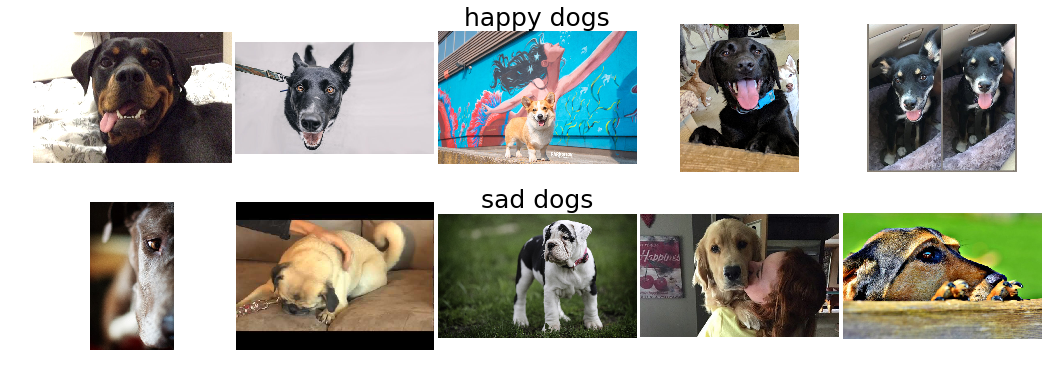

In [8]:
np.random.seed(seed=20)
n_samples = 5
fig, row = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))

for col,folder in zip(row,data_folders):
    col[int(np.floor(n_samples/2))].set_title(folder,fontsize=25)
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    for col_ax,img in zip(col,np.random.choice(os.listdir(os.getcwd()),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load and pre-processing

In [9]:
img_rows = 224
img_cols = 224
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)



### normalization

In [10]:
img_data = np.array(img_list).astype('float32')
img_label = np.array(label_list)
img_data /= np.max(img_data)
# img_data = np.expand_dims(img_data,axis=3) # if gray-scale used

In [11]:
print(img_data.shape)
print(img_label.shape)

(1396, 224, 224, 3)
(1396,)


## Splitting

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1256, 224, 224, 3)
y_train shape: (1256,)
X_valid shape: (70, 224, 224, 3)
y_valid shape: (70,)
X_test shape: (70, 224, 224, 3)
y_test shape: (70,)


## Model building

### directory to save best models

In [13]:
os.mkdir('best_models')

### import modules and params

In [14]:
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dropout,Add
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam

Using TensorFlow backend.


In [15]:
%load_ext autoreload
%autoreload 2
import helper_module as hm

In [16]:
epochs = 200
batch_size = 16 #tested to be optimal by the search not presented here
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=10,verbose=1,factor=0.7,min_lr=0.00001)

### Model #1: arbitrary CNN - initial trial (~ResNet) with Data augmentation
As an initial model, a simple resnet-like model was built. As the available dataset is small, it is augmented using `ImageDataGenerator`.

In [17]:
def identity_block(n_f,x):
    shortcut = x
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut,x])
    x = Activation('relu')(x)
    return x

def conv_block(n_f,x):
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    return x

In [18]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45)
datagen.fit(X_train)

In [19]:
inputs = Input(shape=img_data[0].shape)

model_name = 'Model_1'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
x = conv_block(64,x)
for _ in range(3):
    x = identity_block(64,x)
    
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_1 = Model(inputs,outputs)

model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
print(model_name)
hm.print_train_num_param(model_1)

Model_1
Trainable params: 334,849


In [20]:
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_1 = model_1.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)//batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00077: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00107: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00117: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00127: ReduceLROnPlateau reducing learning rate to 1e-05.


70/70 [==============================] - 0s 1ms/step
Valid: accuracy = 0.771429  ;  loss = 0.810171
Test: accuracy = 0.842857  ;  loss = 0.550564


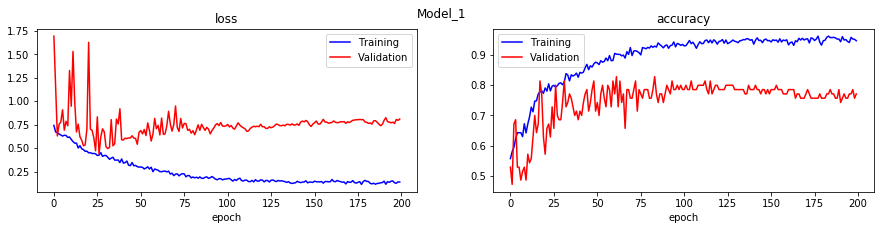

In [21]:
hm.print_valid_test_score(model_1,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_1,model_name) 

In [22]:
from keras.models import load_model
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_1-027-0.437-0.800.hdf5'))
print('Choosing the model via early stopping')
hm.print_valid_test_score(chosen_model,X_valid,y_valid,X_test,y_test)

Choosing the model via early stopping
70/70 [==============================] - 0s 1ms/step
Valid: accuracy = 0.800000  ;  loss = 0.437326
Test: accuracy = 0.785714  ;  loss = 0.503259


### Model #2: improving model #1 with dropout - handling overfitting

In [23]:
model_name = 'Model_2'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
x = Dropout(0.5)(x)
x = conv_block(64,x)
x = Dropout(0.5)(x)
for _ in range(3):
    x = identity_block(64,x)
x = Dropout(0.5)(x)
    
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_2 = Model(inputs,outputs)

model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
print(model_name)
hm.print_train_num_param(model_2)

Model_2
Trainable params: 334,849


In [24]:
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_2 = model_2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)//batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1e-05.


70/70 [==============================] - 0s 1ms/step
Valid: accuracy = 0.728571  ;  loss = 1.080946
Test: accuracy = 0.814286  ;  loss = 0.536273


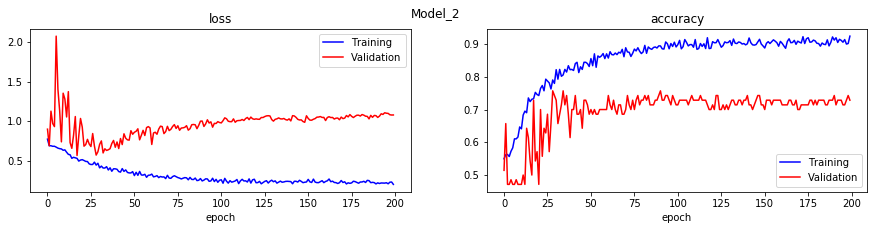

In [25]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_2,model_name) 

In [26]:
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_2-018-0.569-0.729.hdf5'))
print('Choosing the model via early stopping')
hm.print_valid_test_score(chosen_model,X_valid,y_valid,X_test,y_test)

Choosing the model via early stopping
70/70 [==============================] - 0s 1ms/step
Valid: accuracy = 0.728571  ;  loss = 0.568931
Test: accuracy = 0.700000  ;  loss = 0.589918


### Model #3: Transfer learnin gon ResNet50

In [27]:
img_rows = 224
img_cols = 224
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)

img_data = np.array(img_list).astype('float32') ## without resizing
img_label = np.array(label_list)

X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1256, 224, 224, 3)
y_train shape: (1256,)
X_valid shape: (70, 224, 224, 3)
y_valid shape: (70,)
X_test shape: (70, 224, 224, 3)
y_test shape: (70,)


In [28]:
from keras.applications.resnet50 import ResNet50,preprocess_input

In [29]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45,
                             preprocessing_function=preprocess_input)
                             
datagen.fit(X_train)

model_name = 'Model_3'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)
model_3_bottom = ResNet50(include_top=False, weights='imagenet')
last_layer = model_3_bottom.output
x = GlobalAveragePooling2D()(last_layer) #175th layer
# x = Dense(128)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_3 = Model(model_3_bottom.input,outputs)

print(model_name+' before freezing')
hm.print_train_num_param(model_3)
for layer in model_3.layers[:175]:
    layer.trainable=False
print(model_name+' after freezing')
hm.print_train_num_param(model_3)

C:\Users\sungsooc\AppData\Local\Continuum\anaconda3\envs\workspace-gpu-custom-keras\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model_3 before freezing
Trainable params: 23,536,641
Model_3 after freezing
Trainable params: 2,049


In [30]:
model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_3 = model_3.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)//batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00082: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00092: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00102: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00112: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00122: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00132: ReduceLROnPlateau reducing learning rate to 1e-05.


70/70 [==============================] - 0s 6ms/step
Valid: accuracy = 0.785714  ;  loss = 0.549115
Test: accuracy = 0.757143  ;  loss = 0.615957


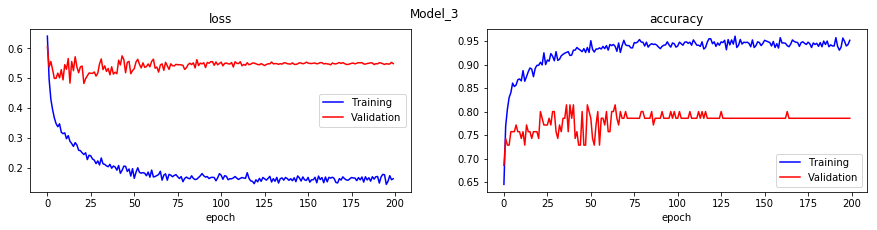

In [31]:
hm.print_valid_test_score(model_3,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_3,model_name) 

In [32]:
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_3-022-0.483-0.800.hdf5'))
print('Choosing the model via early stopping')
hm.print_valid_test_score(chosen_model,X_valid,y_valid,X_test,y_test)

Choosing the model via early stopping
70/70 [==============================] - 0s 6ms/step
Valid: accuracy = 0.800000  ;  loss = 0.482709
Test: accuracy = 0.771429  ;  loss = 0.562989


## Testing new image of Lucky!

#### For best custom model

In [33]:
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_2-018-0.569-0.729.hdf5'))

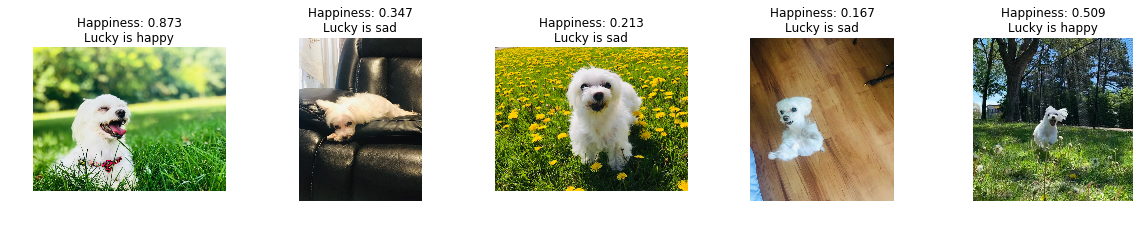

In [34]:
fig, axes = plt.subplots(1, 5, figsize = (4*5, 3*1))
for ax,img_num in zip(axes,range(1,6)):
    img = cv2.imread(os.path.join('test_images','Lucky_'+str(img_num)+'.jpg'))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(img_rows,img_cols)).astype('float32')
    img /= 255
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate = chosen_model.predict(img)[0][0]
    if predict_rate >= 0.5:
        predict_class = 'happy'
    else: predict_class = 'sad'
    ax.set_title('Happiness: {:.3f}\nLucky is {}'.format(predict_rate,predict_class))

#### For best transfer-learned model

In [35]:
chosen_model= load_model(os.path.join('best_models','best-wiehgts-Model_3-022-0.483-0.800.hdf5'))

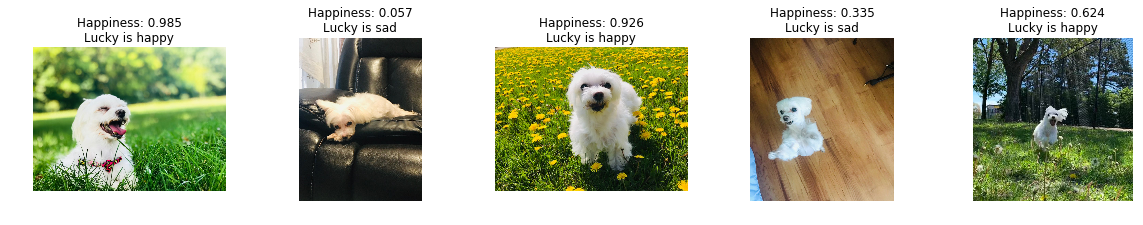

In [36]:
fig, axes = plt.subplots(1, 5, figsize = (4*5, 3*1))
for ax,img_num in zip(axes,range(1,6)):
    img = cv2.imread(os.path.join('test_images','Lucky_'+str(img_num)+'.jpg'))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(img_rows,img_cols)).astype('float32')
    img = preprocess_input(img)
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate = chosen_model.predict(img)[0][0]
    if predict_rate >= 0.5:
        predict_class = 'happy'
    else: predict_class = 'sad'
    ax.set_title('Happiness: {:.3f}\nLucky is {}'.format(predict_rate,predict_class))